In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [2]:
file='indeed_job_dataset.csv'

In [3]:
indeed_df=pd.read_csv(file,sep=',')
indeed_df.head()

,Unnamed: 0,Job_Title,Link,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,...,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
0,0,Data Scientist,https://www.indeed.com/rc/clk?jk=6a105f495c36a...,<80000,data_scientist,"['SAP', 'SQL']",2,Express Scripts,3301.0,3.3,...,0,0,0,1,0,0,0,1,0,0
1,1,Data Scientist,https://www.indeed.com/rc/clk?jk=86afd561ea8c6...,<80000,data_scientist,"['Machine Learning', 'R', 'SAS', 'SQL', 'Python']",5,Money Mart Financial Services,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,2,Data Scientist,https://www.indeed.com/rc/clk?jk=e0aad317e6d45...,<80000,data_scientist,"['Data Mining', 'Data Management', 'R', 'SAS',...",9,comScore,62.0,3.5,...,0,0,0,1,0,0,0,0,0,0
3,3,Graduate Studies Program - Data Scientist,https://www.indeed.com/rc/clk?jk=1cfdd9e391a63...,<80000,data_scientist,['Certified Internal Auditor'],1,Central Intelligence Agency,158.0,4.3,...,0,1,0,0,0,0,0,0,0,1
4,4,Data Scientist I,https://www.indeed.com/rc/clk?jk=fec647775a21e...,<80000,data_scientist,"['Statistical Software', 'Time Management', 'R...",7,Federal Reserve Bank of Dallas,495.0,4.1,...,0,0,0,0,0,0,1,0,0,0


In [4]:
group_indeed=indeed_df.groupby('Job_Type')
s=['python','sql','machine learning','r','hadoop','tableau','sas','spark','java','Others']
s_0=group_indeed[s[0]].value_counts()
s_1=group_indeed[s[1]].value_counts()
s_2=group_indeed[s[2]].value_counts()
s_3=group_indeed[s[3]].value_counts()
s_4=group_indeed[s[4]].value_counts()
s_5=group_indeed[s[5]].value_counts()
s_6=group_indeed[s[6]].value_counts()
s_7=group_indeed[s[7]].value_counts()
s_8=group_indeed[s[8]].value_counts()


skills_df=pd.DataFrame({'python':s_0,
                       'sql':s_1,
                       'machine learning':s_2,
                       'r':s_3,
                       'hadoop':s_4,
                       'tableau':s_5,
                       'sas':s_6,
                       'spark':s_7,
                       'java':s_8})
new_skills_df=skills_df.reset_index(inplace=False,drop=False)
new_skills_df

,level_0,level_1,python,sql,machine learning,r,hadoop,tableau,sas,spark,java,Others
0,data_analyst,0,1281,749,1627,1337,1667,1255,1483,1726,1692,331
1,data_analyst,1,512,1044,166,456,126,538,310,67,101,1462
2,data_engineer,0,478,512,1090,1151,618,1165,1312,660,675,41
3,data_engineer,1,901,867,289,228,761,214,67,719,704,1338
4,data_scientist,0,631,1350,701,993,1716,2059,1979,1798,1868,191
5,data_scientist,1,1912,1193,1842,1550,827,484,564,745,675,2352


In [97]:
skill_count=new_skills_df[new_skills_df['level_1']==1]
skill_count_new=skill_count.rename(columns={'level_0':'Job Type '})
skill_count_df=skill_count_new.drop(['level_1'], axis=1)
skill_count_df

,Job Type,python,sql,machine learning,r,hadoop,tableau,sas,spark,java,Others
1,data_analyst,512,1044,166,456,126,538,310,67,101,1462
3,data_engineer,901,867,289,228,761,214,67,719,704,1338
5,data_scientist,1912,1193,1842,1550,827,484,564,745,675,2352


In [62]:
pos=list(range(len(skill_count_df['python'])))
width=0.05

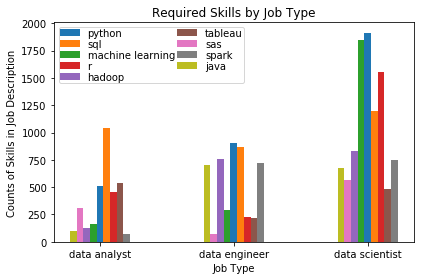

In [94]:
plt.bar(pos,skill_count_df['python'],width,label='python')
plt.bar([p+width for p in pos],skill_count_df['sql'],width,label='sql')
plt.bar([p-width for p in pos],skill_count_df['machine learning'],width,label='machine learning')
plt.bar([p+2*width for p in pos],skill_count_df['r'],width,label='r')
plt.bar([p-2*width for p in pos],skill_count_df['hadoop'],width,label='hadoop')
plt.bar([p+3*width for p in pos],skill_count_df['tableau'],width,label='tableau')
plt.bar([p-3*width for p in pos],skill_count_df['sas'],width,label='sas')
plt.bar([p+4*width for p in pos],skill_count_df['spark'],width,label='spark')
plt.bar([p-4*width for p in pos],skill_count_df['java'],width,label='java')
plt.xticks(pos,['data analyst','data engineer','data scientist'])
plt.legend(ncol=2,borderpad=0.1,labelspacing=0.1,columnspacing=0.2)
plt.xlabel('Job Type')
plt.ylabel('Counts of Skills in Job Description')
plt.title('Required Skills by Job Type')
plt.tight_layout()
plt.savefig('skills_by_job_type',dpi=1000)
plt.show()

In [102]:
py_chisq,py_p=stats.chisquare(skill_count_df['python'])
sql_chisq,sql_p=stats.chisquare(skill_count_df['sql'])
ml_chisq,ml_p=stats.chisquare(skill_count_df['machine learning'])
r_chisq,r_p=stats.chisquare(skill_count_df['r'])
h_chisq,h_p=stats.chisquare(skill_count_df['hadoop'])
t_chisq,t_p=stats.chisquare(skill_count_df['tableau'])
sas_chisq,sas_p=stats.chisquare(skill_count_df['sas'])
spk_chisq,spk_p=stats.chisquare(skill_count_df['spark'])
j_chisq,j_p=stats.chisquare(skill_count_df['java'])


In [103]:
skill_summary=pd.DataFrame({'Skills':['python','sql','machine learning','r','hadoop','tableau','sas','spark','java'],
                          'P value':[py_p,sql_p,ml_p,r_p,h_p,t_p,sas_p,spk_p,j_p]})
skill_summary

,Skills,P value
0,python,2.306332e-205
1,sql,6.613250e-12
2,machine learning,0.000000e+00
3,r,5.451765e-292
4,hadoop,1.281344e-114
5,tableau,1.727717e-32
6,sas,3.058611e-86
7,spark,2.579013e-126
8,java,1.536059e-102


In [114]:
s_indeed=indeed_df.groupby('Queried_Salary')
sk=['python','sql','machine learning','r','hadoop','tableau','sas','spark','java']
sk_0=s_indeed[sk[0]].sum()
sk_1=s_indeed[sk[1]].sum()
sk_2=s_indeed[sk[2]].sum()
sk_3=s_indeed[sk[3]].sum()
sk_4=s_indeed[sk[4]].sum()
sk_5=s_indeed[sk[5]].sum()
sk_6=s_indeed[sk[6]].sum()
sk_7=s_indeed[sk[7]].sum()
sk_8=s_indeed[sk[8]].sum()


salary_df=pd.DataFrame({'python':sk_0,
                       'sql':sk_1,
                       'machine learning':sk_2,
                       'r':sk_3,
                       'hadoop':sk_4,
                       'tableau':sk_5,
                       'sas':sk_6,
                       'spark':sk_7,
                       'java':sk_8})
salary_df.reset_index(inplace=True,drop=False)
salary_df['order']=[3,4,5,2,1,6]
s_s_df=salary_df.sort_values(['order'])
s_s_df

,Queried_Salary,python,sql,machine learning,r,hadoop,tableau,sas,spark,java,order
4,<80000,144,367,67,148,12,162,131,9,34,1
3,80000-99999,412,618,201,311,97,283,156,71,102,2
0,100000-119999,861,840,579,648,410,357,288,347,375,3
1,120000-139999,957,720,687,601,593,253,189,536,474,4
2,140000-159999,674,388,533,376,424,138,124,397,359,5
5,>160000,277,171,230,150,178,43,53,171,136,6


In [116]:
pos=list(range(len(s_s_df['Queried_Salary'])))
width=0.05

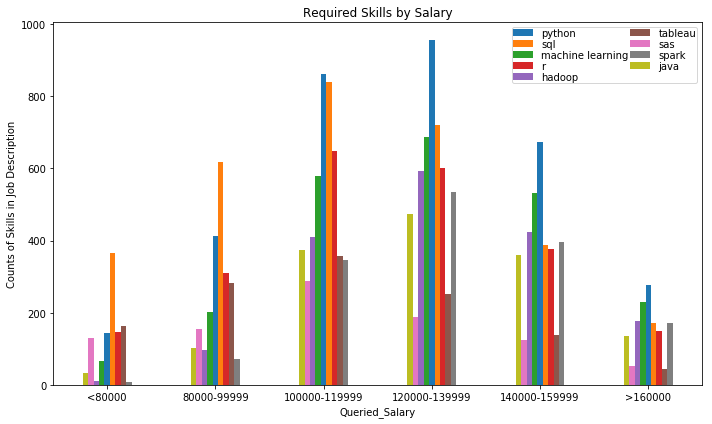

In [127]:
plt.figure(figsize=(10,6))
plt.bar(pos,s_s_df['python'],width,label='python')
plt.bar([p+width for p in pos],s_s_df['sql'],width,label='sql')
plt.bar([p-width for p in pos],s_s_df['machine learning'],width,label='machine learning')
plt.bar([p+2*width for p in pos],s_s_df['r'],width,label='r')
plt.bar([p-2*width for p in pos],s_s_df['hadoop'],width,label='hadoop')
plt.bar([p+3*width for p in pos],s_s_df['tableau'],width,label='tableau')
plt.bar([p-3*width for p in pos],s_s_df['sas'],width,label='sas')
plt.bar([p+4*width for p in pos],s_s_df['spark'],width,label='spark')
plt.bar([p-4*width for p in pos],s_s_df['java'],width,label='java')
plt.xticks(pos,s_s_df['Queried_Salary'])
plt.legend(ncol=2,borderpad=0.1,labelspacing=0.1,columnspacing=0.2)
plt.xlabel('Queried_Salary')
plt.ylabel('Counts of Skills in Job Description')
plt.title('Required Skills by Salary')
plt.tight_layout()
plt.savefig('Required Skills by Salary',dpi=1000)
plt.show()

In [124]:
py2_chisq,py2_p=stats.chisquare(s_s_df['python'])
sql2_chisq,sql2_p=stats.chisquare(s_s_df['sql'])
ml2_chisq,ml2_p=stats.chisquare(s_s_df['machine learning'])
r2_chisq,r2_p=stats.chisquare(s_s_df['r'])
h2_chisq,h2_p=stats.chisquare(s_s_df['hadoop'])
t2_chisq,t2_p=stats.chisquare(s_s_df['tableau'])
sas2_chisq,sas2_p=stats.chisquare(s_s_df['sas'])
spk2_chisq,spk2_p=stats.chisquare(s_s_df['spark'])
j2_chisq,j2_p=stats.chisquare(s_s_df['java'])

In [126]:
salary_summary=pd.DataFrame({'Skills':['python','sql','machine learning','r','hadoop','tableau','sas','spark','java'],
                          'P value':[py2_p,sql2_p,ml2_p,r2_p,h2_p,t2_p,sas2_p,spk2_p,j2_p]})
salary_summary

,Skills,P value
0,python,7.175707e-207
1,sql,3.577868e-129
2,machine learning,1.292217e-172
3,r,2.649499e-132
4,hadoop,8.879626e-188
5,tableau,4.297956e-65
6,sas,1.868421e-40
7,spark,8.371154e-175
8,java,3.301420e-137
